# <u>Import necessary libraries</u>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# <u>Import the dataset</u>

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# <u>Data Preprocessing</u>

In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
corr= df.corr()

In [10]:
corr

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

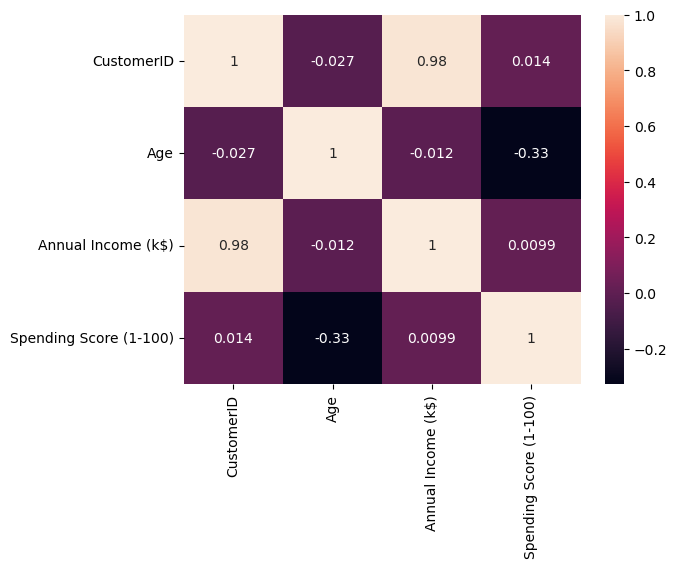

In [11]:
sns.heatmap(corr, annot=True)

In [12]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [13]:
df.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [14]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
le=LabelEncoder()

In [16]:
df["Genre"]=le.fit_transform(df["Genre"])

In [17]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# <u>Select the Features to cluster</u>

In [18]:
X=df.iloc[:,1:].values

In [19]:
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

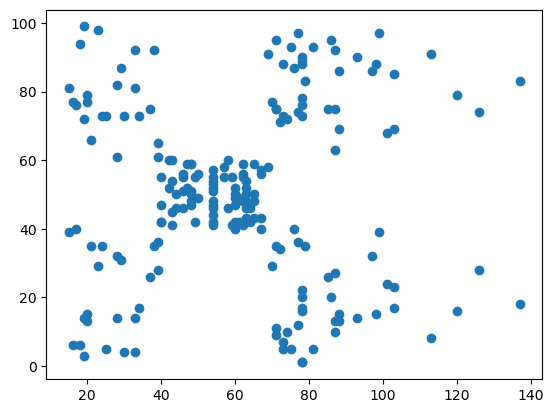

In [20]:
plt.scatter(X[:,2],X[:,3])

# <u>Find optimal no.of clusters - Elbow Method</u>

In [21]:
wcss=[]
for k in range(1,11):#k=1  to 10
    kmeans=KMeans(n_clusters=k, init="k-means++",random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [22]:
wcss

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51165.184237107926,
 44389.807673557676,
 40670.989962363215,
 37201.52704476877]

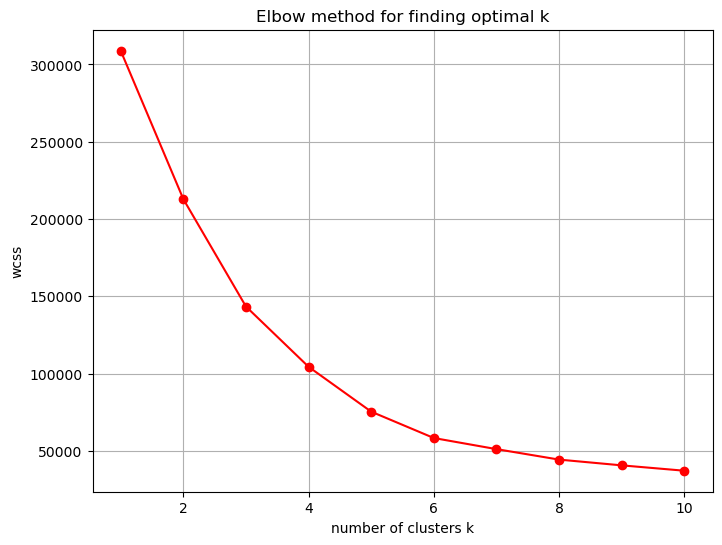

In [23]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker="o",color="red")
plt.title("Elbow method for finding optimal k")
plt.xlabel("number of clusters k")
plt.ylabel("wcss")
plt.grid()
plt.show()

In [24]:
kmeans=KMeans(n_clusters=5, init="k-means++",random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [25]:
y_kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [26]:
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

# <u>Train the model on the dataset using the optimal cluster k value</u>

In [27]:
optimal_k = 5

In [28]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

In [29]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

# <u>Visulation of the clusters</u>

In [30]:
X[y_kmeans==0,0]

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0], dtype=int64)

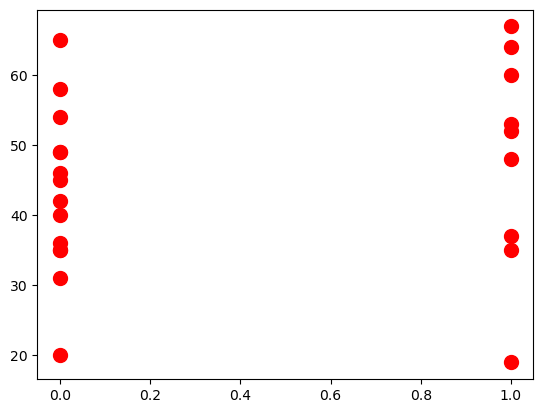

In [31]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],color="red",s=100,label="cluster1")

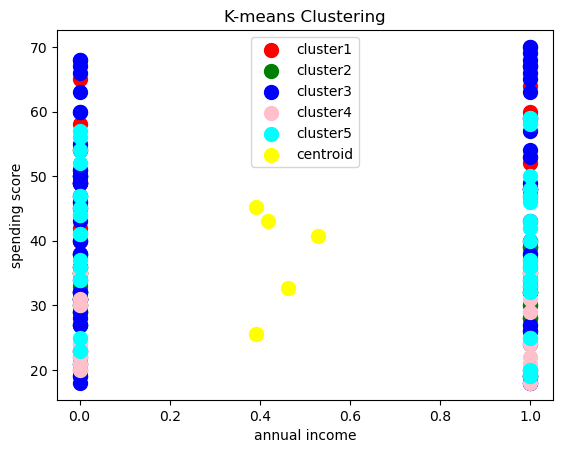

In [32]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],color="red",s=100,label="cluster1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],color="green",s=100,label="cluster2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],color="blue",s=100,label="cluster3")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],color="pink",s=100,label="cluster4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],color="cyan",s=100,label="cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",s=100,label="centroid")
plt.title("K-means Clustering")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()

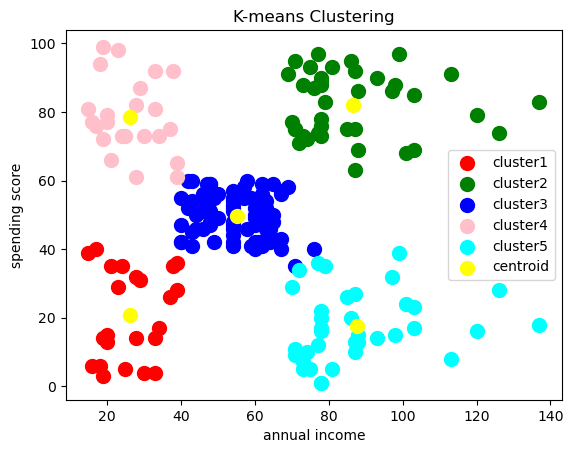

In [33]:
plt.scatter(X[y_kmeans==0,2],X[y_kmeans==0,3],color="red",s=100,label="cluster1")
plt.scatter(X[y_kmeans==1,2],X[y_kmeans==1,3],color="green",s=100,label="cluster2")
plt.scatter(X[y_kmeans==2,2],X[y_kmeans==2,3],color="blue",s=100,label="cluster3")
plt.scatter(X[y_kmeans==3,2],X[y_kmeans==3,3],color="pink",s=100,label="cluster4")
plt.scatter(X[y_kmeans==4,2],X[y_kmeans==4,3],color="cyan",s=100,label="cluster5")

plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],color="yellow",s=100,label="centroid")
plt.title("K-means Clustering")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()

In [34]:
kmeans.predict([[0,45,20,111]])

array([4])

In [35]:
kmeans.predict([[1,45,120,111]])

array([2])